# Your first deep neural network

# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

# data

In [10]:
NUM_CLASSES = 10
batch_size = 256
epochs = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# train

In [12]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy'
              , optimizer=opt, 
              metrics=['accuracy'])

In [13]:
model.fit(x_train
          , y_train
          , batch_size=batch_size
          , epochs=epochs
          , shuffle=True)

Epoch 1/10
196/196 [==============================] - 1s 4ms/step - loss: 1.2312 - accuracy: 0.5637
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 1.2129 - accuracy: 0.5710
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 1.2074 - accuracy: 0.5699
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 1.1984 - accuracy: 0.5774
Epoch 5/10
196/196 [==============================] - 1s 4ms/step - loss: 1.1973 - accuracy: 0.5741
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 1.1986 - accuracy: 0.5771
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 1.1848 - accuracy: 0.5843
Epoch 8/10
196/196 [==============================] - 1s 4ms/step - loss: 1.1669 - accuracy: 0.5863
Epoch 9/10
196/196 [==============================] - 1s 4ms/step - loss: 1.1601 - accuracy: 0.5911
Epoch 10/10
196/196 [==============================] - 1s 4ms/step - loss: 1.1689 - accuracy: 0.5834

# analysis

In [14]:
def my_eval(model, x_test, y_test):
    ev = model.evaluate(x_test, y_test)
    print("loss:", end = " ")
    print(ev[0])
    print("acc:", end = "")
    print(ev[1])

In [15]:
my_eval(model ,x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3808 - accuracy: 0.5114
loss: 1.3807722330093384
acc:0.5113999843597412


In [16]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 
                    'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

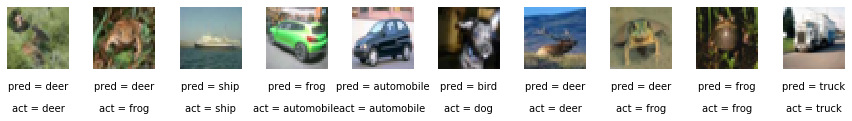

In [17]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]),
            fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), 
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
